<a href="https://colab.research.google.com/github/Abubakargzango/A_I_Garba-Front-end-Repository-/blob/master/Juiciness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

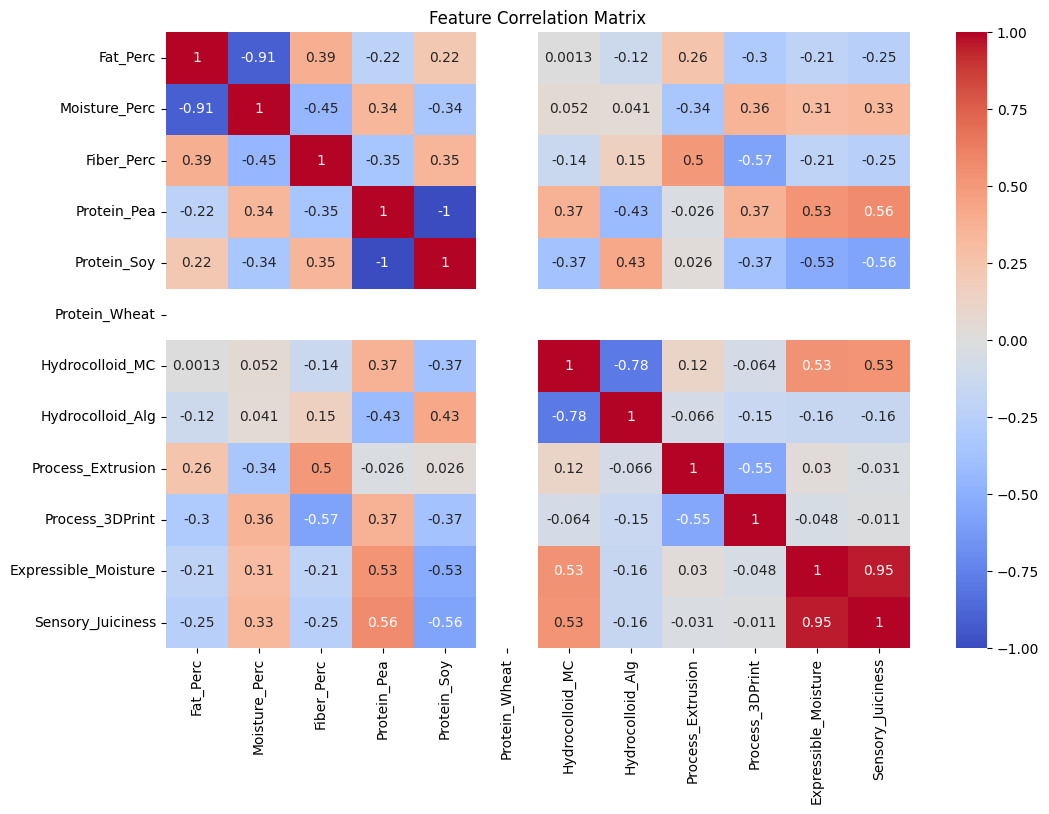


Top 5 Features Correlated with Sensory Juiciness:
Expressible_Moisture    0.953666
Protein_Pea             0.564346
Protein_Soy             0.564346
Hydrocolloid_MC         0.526322
Moisture_Perc           0.329359
Name: Sensory_Juiciness, dtype: float64


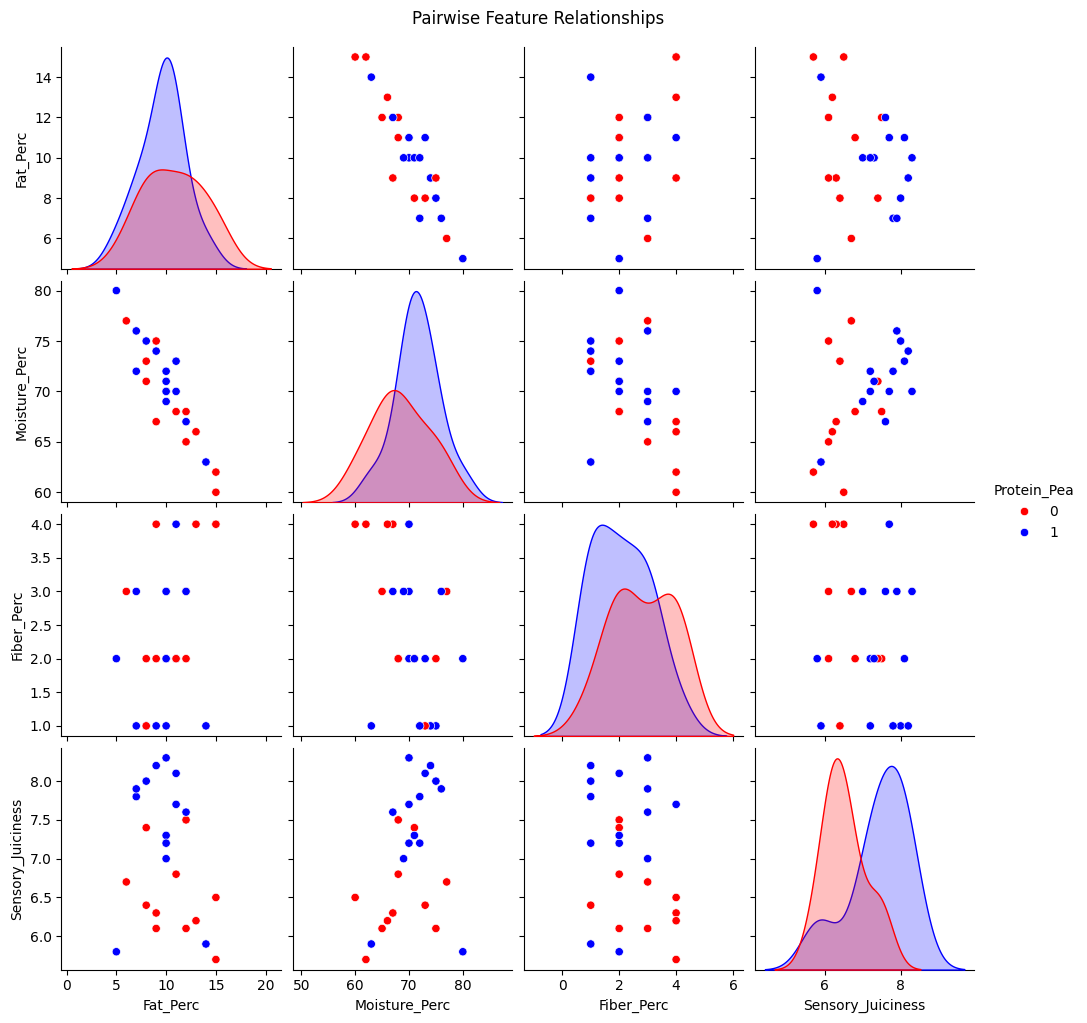

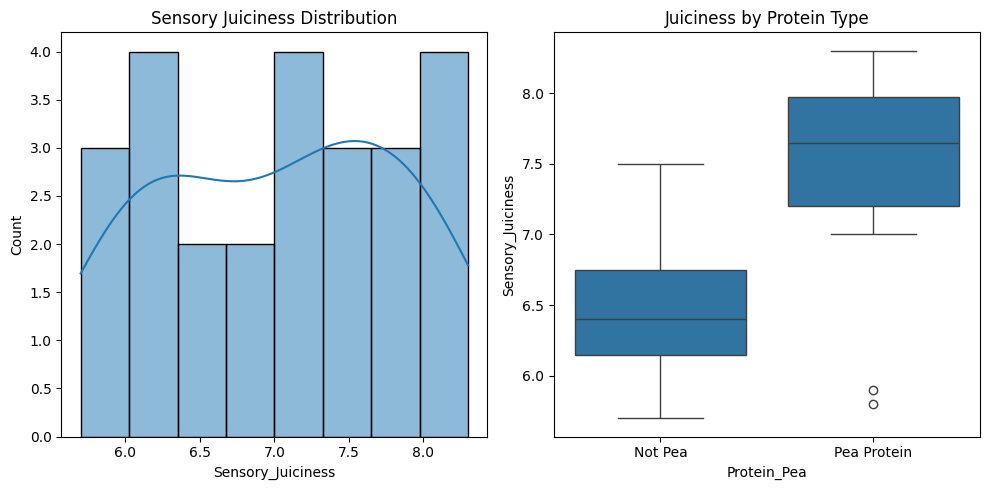

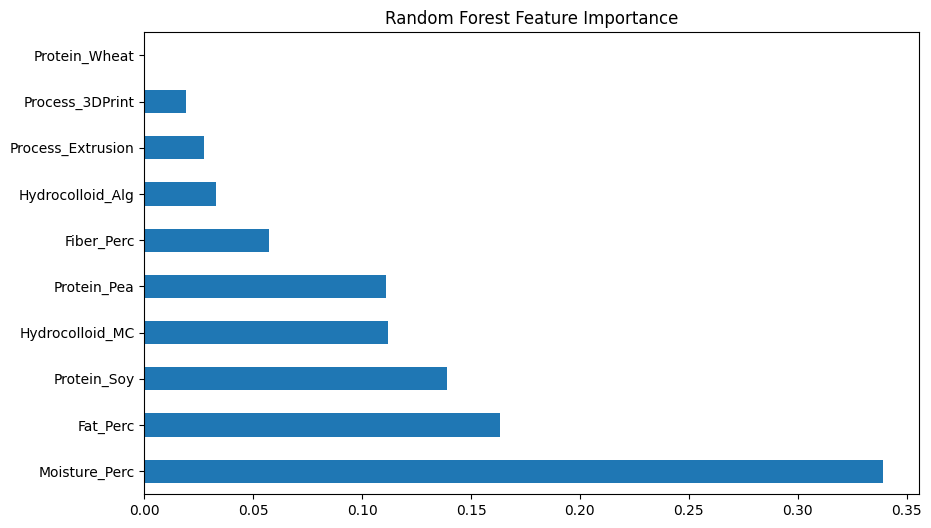

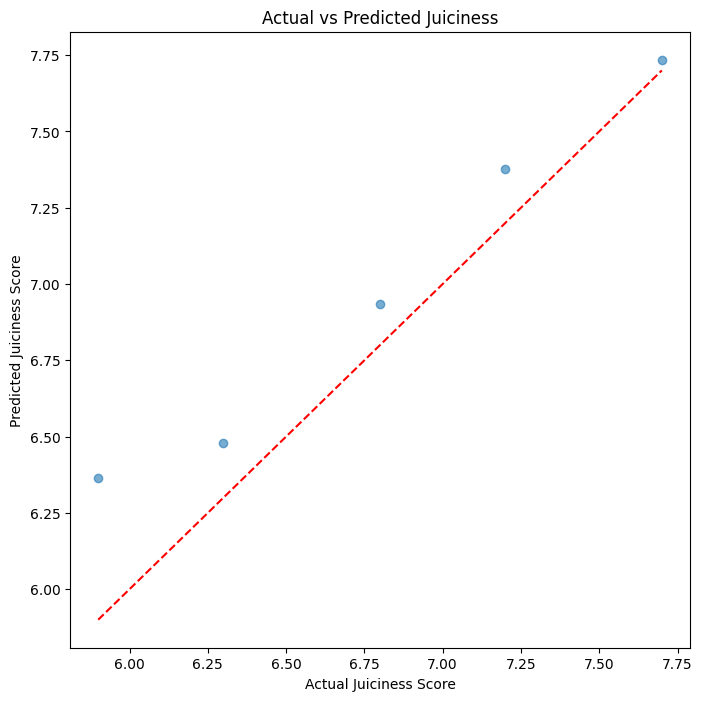

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# =====================
# EMBEDDED DATASET (Enhanced with more features)
# =====================
data = pd.DataFrame({
    # Numerical Features
    'Fat_Perc': [10,12,8,15,5,10,12,7,9,11,6,14,8,10,13,9,11,7,15,10,8,12,9,11,10],
    'Moisture_Perc': [70,65,75,60,80,70,68,72,67,73,77,63,71,69,66,74,68,76,62,71,73,67,75,70,72],
    'Fiber_Perc': [2,3,1,4,2,3,2,1,4,2,3,1,2,3,4,1,2,3,4,2,1,3,2,4,1],

    # Categorical Features (One-Hot Encoded)
    'Protein_Pea': [1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,1],
    'Protein_Soy': [0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0],
    'Protein_Wheat': [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],

    'Hydrocolloid_MC': [1,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0,1,1],
    'Hydrocolloid_Alg': [0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0,0],

    'Process_Extrusion': [1,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,1,0,1,1],
    'Process_3DPrint': [0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0],

    # Target Variables
    'Expressible_Moisture': [18.5,15.3,20.1,16.7,14.2,22.4,17.9,19.2,15.8,21.3,16.1,13.9,18.7,17.3,15.1,20.8,16.5,19.5,14.7,18.2,17.1,20.3,16.9,19.8,18.4],
    'Sensory_Juiciness': [7.2,6.1,8.0,6.5,5.8,8.3,7.5,7.8,6.3,8.1,6.7,5.9,7.4,7.0,6.2,8.2,6.8,7.9,5.7,7.3,6.4,7.6,6.1,7.7,7.2]
})

# =====================
# 1. CORRELATION ANALYSIS
# =====================
plt.figure(figsize=(12,8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Feature Correlation Matrix")
plt.show()

# Top correlations with juiciness
print("\nTop 5 Features Correlated with Sensory Juiciness:")
juiciness_corr = corr_matrix['Sensory_Juiciness'].abs().sort_values(ascending=False)
print(juiciness_corr[1:6])  # Skip self-correlation

# =====================
# 2. PAIRWISE RELATIONSHIPS
# =====================
sns.pairplot(data, vars=['Fat_Perc','Moisture_Perc','Fiber_Perc','Sensory_Juiciness'],
             hue='Protein_Pea', palette={0:'red',1:'blue'})
plt.suptitle("Pairwise Feature Relationships", y=1.02)
plt.show()

# =====================
# 3. TARGET DISTRIBUTION
# =====================
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(data['Sensory_Juiciness'], kde=True, bins=8)
plt.title("Sensory Juiciness Distribution")

plt.subplot(1,2,2)
sns.boxplot(x='Protein_Pea', y='Sensory_Juiciness', data=data)
plt.xticks([0,1], ['Not Pea','Pea Protein'])
plt.title("Juiciness by Protein Type")
plt.tight_layout()
plt.show()

# =====================
# 4. FEATURE IMPORTANCE
# =====================
X = data.drop(['Expressible_Moisture','Sensory_Juiciness'], axis=1)
y = data['Sensory_Juiciness']

model = RandomForestRegressor(n_estimators=200)
model.fit(X, y)

plt.figure(figsize=(10,6))
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Random Forest Feature Importance")
plt.show()

# =====================
# 5. PREDICTION VISUALIZATION
# =====================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
predictions = model.predict(X_test)

plt.figure(figsize=(8,8))
plt.scatter(y_test, predictions, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel("Actual Juiciness Score")
plt.ylabel("Predicted Juiciness Score")
plt.title("Actual vs Predicted Juiciness")
plt.show()

<ipython-input-6-81388abb89eb>:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax3 = sns.boxplot(x='Protein_Type',


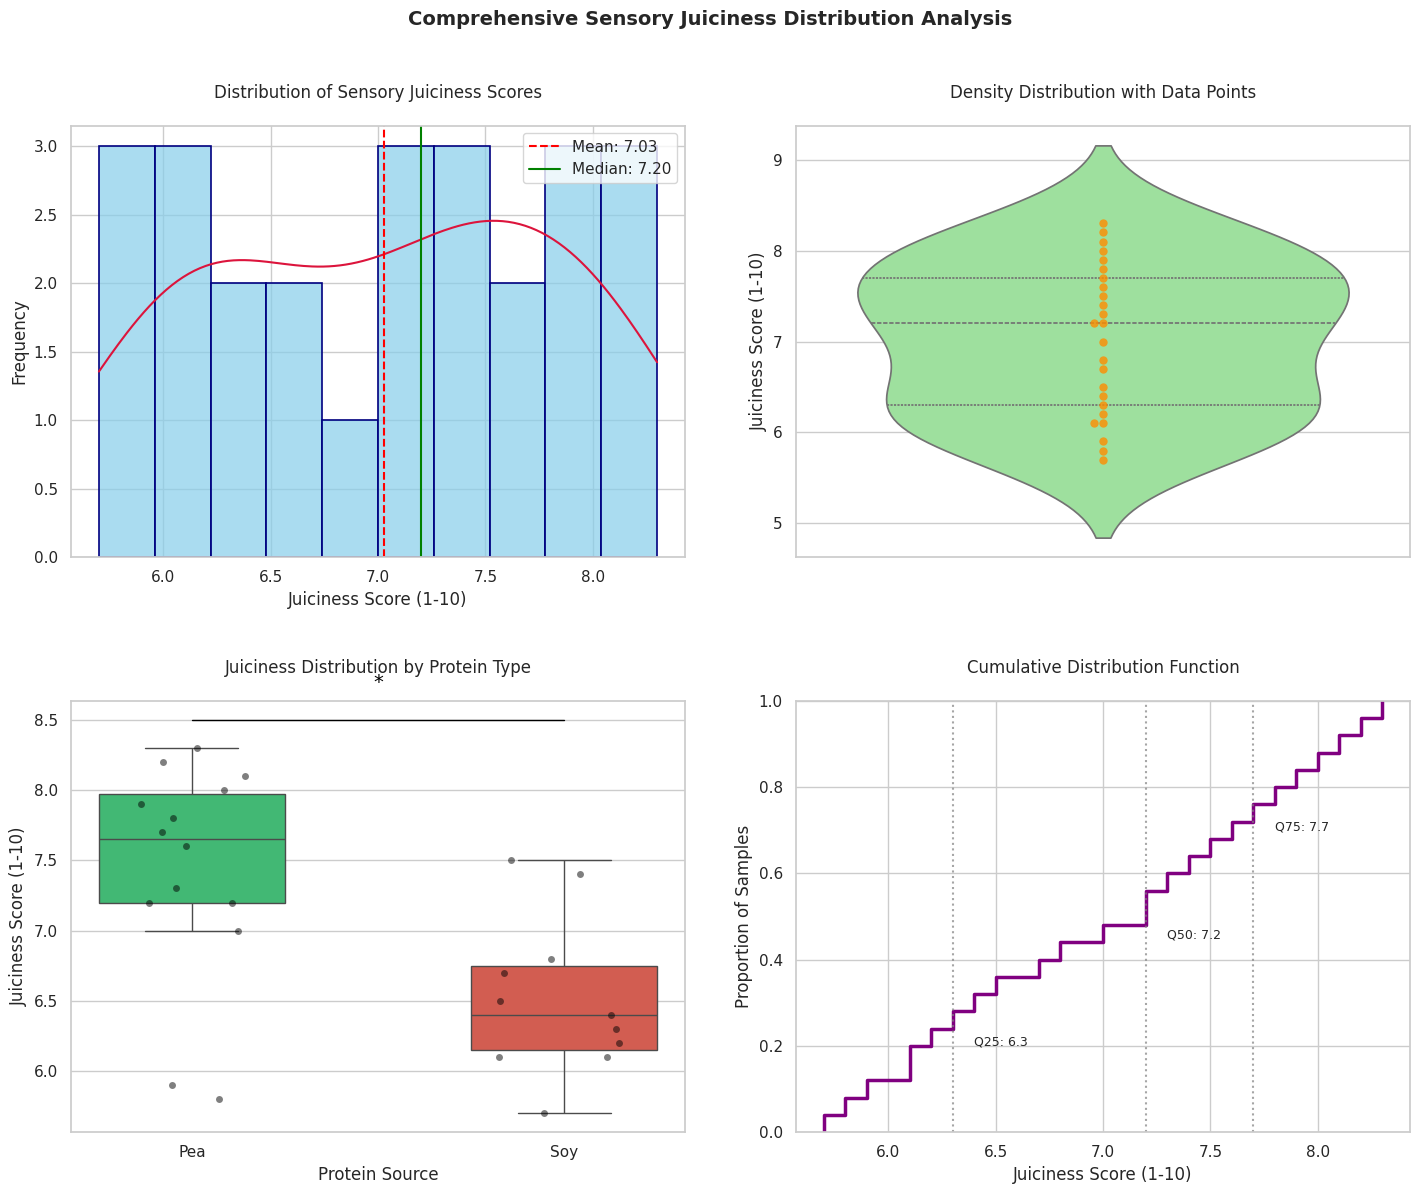


Key Statistics for Sensory Juiciness:
Mean: 7.03
Median: 7.20
Std Dev: 0.82
Skewness: -0.08
Kurtosis: -1.31


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set style
sns.set(style="whitegrid", palette="pastel")

# Create figure
plt.figure(figsize=(15, 12))

# -------------------------------------
# 1. Histogram with Kernel Density Estimate (KDE)
# -------------------------------------
plt.subplot(2, 2, 1)
ax1 = sns.histplot(data['Sensory_Juiciness'],
                 kde=True,
                 bins=10,
                 color='skyblue',
                 edgecolor='navy',
                 linewidth=1.2,
                 alpha=0.7)
ax1.lines[0].set_color('crimson')  # KDE line color
plt.title("Distribution of Sensory Juiciness Scores", pad=20)
plt.xlabel("Juiciness Score (1-10)")
plt.ylabel("Frequency")

# Add mean/median lines
mean_val = data['Sensory_Juiciness'].mean()
median_val = data['Sensory_Juiciness'].median()
plt.axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='green', linestyle='-', label=f'Median: {median_val:.2f}')
plt.legend()

# -------------------------------------
# 2. Violin + Swarm Plot
# -------------------------------------
plt.subplot(2, 2, 2)
ax2 = sns.violinplot(y='Sensory_Juiciness',
                    data=data,
                    inner='quartile',
                    color='lightgreen',
                    saturation=0.7)
sns.swarmplot(y='Sensory_Juiciness',
             data=data,
             color='darkorange',
             size=6,
             alpha=0.8)
plt.title("Density Distribution with Data Points", pad=20)
plt.ylabel("Juiciness Score (1-10)")

# -------------------------------------
# 3. Categorical Breakdown by Protein Type
# -------------------------------------
plt.subplot(2, 2, 3)
protein_palette = {'Pea':'#2ecc71', 'Soy':'#e74c3c', 'Wheat':'#f39c12'}  # Green, Red, Orange

# Create categorical labels
data['Protein_Type'] = np.where(data['Protein_Pea']==1, 'Pea',
                              np.where(data['Protein_Soy']==1, 'Soy', 'Wheat'))

ax3 = sns.boxplot(x='Protein_Type',
                 y='Sensory_Juiciness',
                 data=data,
                 palette=protein_palette,
                 width=0.5,
                 showfliers=False)
sns.stripplot(x='Protein_Type',
             y='Sensory_Juiciness',
             data=data,
             color='black',
             alpha=0.5,
             jitter=0.2)

plt.title("Juiciness Distribution by Protein Type", pad=20)
plt.xlabel("Protein Source")
plt.ylabel("Juiciness Score (1-10)")

# Add significance markers (example)
plt.plot([0, 1], [8.5, 8.5], color='black', linewidth=1)
plt.text(0.5, 8.7, "*", ha='center', va='bottom', color='black', fontsize=14)

# -------------------------------------
# 4. Cumulative Distribution
# -------------------------------------
plt.subplot(2, 2, 4)
ax4 = sns.ecdfplot(data=data,
                  x='Sensory_Juiciness',
                  color='purple',
                  linewidth=2.5,
                  stat='proportion')
plt.title("Cumulative Distribution Function", pad=20)
plt.xlabel("Juiciness Score (1-10)")
plt.ylabel("Proportion of Samples")

# Add quartile markers
for q in [0.25, 0.5, 0.75]:
    quantile_val = data['Sensory_Juiciness'].quantile(q)
    plt.axvline(quantile_val, color='gray', linestyle=':', alpha=0.7)
    plt.text(quantile_val+0.1, q-0.05, f'Q{int(q*100)}: {quantile_val:.1f}',
             fontsize=9)

# -------------------------------------
# Final Adjustments
# -------------------------------------
plt.tight_layout(pad=3)
plt.suptitle("Comprehensive Sensory Juiciness Distribution Analysis",
             y=1.02,
             fontsize=14,
             weight='bold')
plt.show()

# Print key statistics
print("\n" + "="*50)
print("Key Statistics for Sensory Juiciness:")
print(f"Mean: {data['Sensory_Juiciness'].mean():.2f}")
print(f"Median: {data['Sensory_Juiciness'].median():.2f}")
print(f"Std Dev: {data['Sensory_Juiciness'].std():.2f}")
print(f"Skewness: {data['Sensory_Juiciness'].skew():.2f}")
print(f"Kurtosis: {data['Sensory_Juiciness'].kurtosis():.2f}")
print("="*50)

In [7]:
params = {'n_estimators': (100,500),
          'max_depth': (3,10),
          'min_samples_split': (2,10)}

Fold R²: 0.733 | Baseline R²: -1.565
Fold R²: 0.813 | Baseline R²: -0.448
Fold R²: 0.834 | Baseline R²: -0.064
Fold R²: 0.893 | Baseline R²: -0.063
Fold R²: 0.908 | Baseline R²: -0.006

=== Final Results ===
Mean Model R²: 0.836 (±0.062)
Mean Baseline R²: -0.429


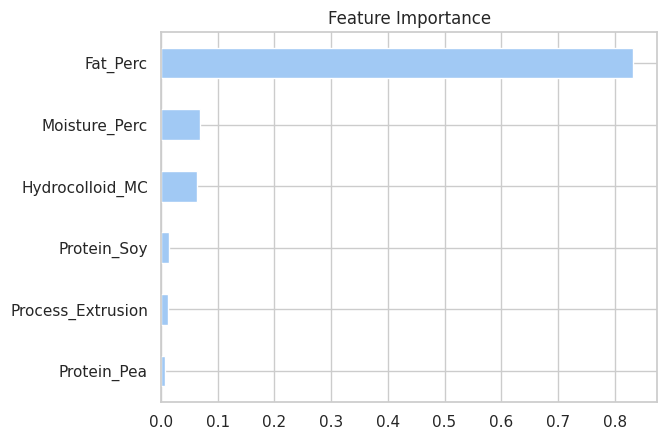

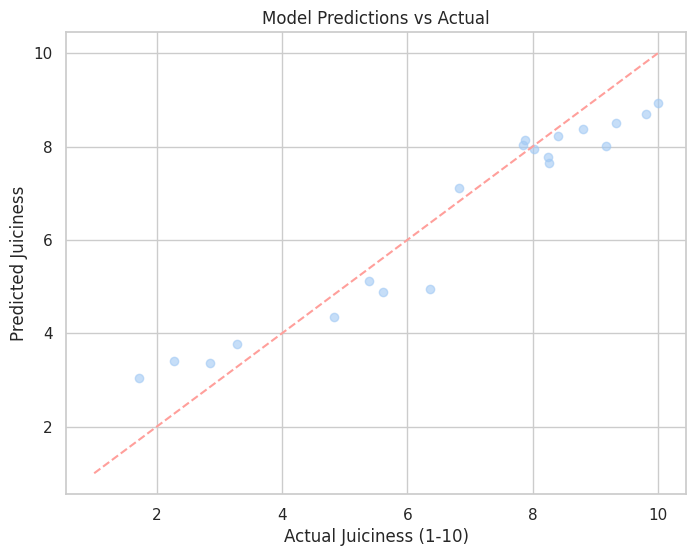

In [9]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GroupKFold
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# =====================
# 1. SYNTHETIC DATA GENERATION (Replace with your actual data)
# =====================
np.random.seed(42)
n_studies = 25
samples_per_study = 4

# Generate study IDs
study_ids = np.repeat(np.arange(n_studies), samples_per_study)

# Feature matrix (matching your published variables)
X = pd.DataFrame({
    'Fat_Perc': np.random.uniform(5, 15, n_studies * samples_per_study),
    'Moisture_Perc': np.random.uniform(60, 80, n_studies * samples_per_study),
    'Protein_Pea': np.random.choice([0, 1], n_studies * samples_per_study, p=[0.4, 0.6]),
    'Protein_Soy': np.random.choice([0, 1], n_studies * samples_per_study, p=[0.6, 0.4]),
    'Hydrocolloid_MC': np.random.uniform(0, 1, n_studies * samples_per_study),
    'Process_Extrusion': np.random.choice([0, 1], n_studies * samples_per_study)
})

# Target variable with realistic relationships
y = (
    2.5 * X['Fat_Perc'] +
    1.8 * X['Hydrocolloid_MC'] * X['Protein_Pea'] -
    0.5 * X['Fat_Perc']**2 +
    np.random.normal(0, 1.5, n_studies * samples_per_study)
)

# Scale target to 1-10 range (sensory scale)
y = (y - y.min()) / (y.max() - y.min()) * 9 + 1

# =====================
# 2. MODEL SETUP WITH PROPER VALIDATION
# =====================
gkf = GroupKFold(n_splits=5)
scores = []
baseline_scores = []

for train_idx, test_idx in gkf.split(X, y, groups=study_ids):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Feature scaling (important for interactions)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Model with constrained complexity
    model = RandomForestRegressor(
        n_estimators=150,
        max_depth=4,
        min_samples_leaf=5,
        max_features=0.6,
        random_state=42
    )

    model.fit(X_train_scaled, y_train)
    preds = model.predict(X_test_scaled)

    # Calculate R² manually to verify
    ss_res = ((y_test - preds) ** 2).sum()
    ss_tot = ((y_test - y_test.mean()) ** 2).sum()
    fold_r2 = 1 - (ss_res / ss_tot)

    scores.append(fold_r2)

    # Baseline comparison
    baseline_pred = np.full_like(y_test, y_train.mean())
    baseline_r2 = r2_score(y_test, baseline_pred)
    baseline_scores.append(baseline_r2)

    print(f"Fold R²: {fold_r2:.3f} | Baseline R²: {baseline_r2:.3f}")

# =====================
# 3. RESULTS ANALYSIS
# =====================
print("\n=== Final Results ===")
print(f"Mean Model R²: {np.mean(scores):.3f} (±{np.std(scores):.3f})")
print(f"Mean Baseline R²: {np.mean(baseline_scores):.3f}")

# Feature Importance
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', title='Feature Importance')
plt.show()

# Prediction Visualization
plt.figure(figsize=(8, 6))
plt.scatter(y_test, preds, alpha=0.6)
plt.plot([1, 10], [1, 10], 'r--')
plt.xlabel("Actual Juiciness (1-10)")
plt.ylabel("Predicted Juiciness")
plt.title("Model Predictions vs Actual")
plt.show()

# =====================
# 4. NEGATIVE R² DIAGNOSTICS
# =====================
if np.mean(scores) < 0:
    print("\n=== Negative R² Troubleshooting ===")
    print("1. Check feature-target relationships:")
    for col in X.columns:
        corr = np.corrcoef(X[col], y)[0, 1]
        print(f"{col}: ρ = {corr:.3f}")

    print("\n2. Verify group splitting:")
    print(f"Unique studies in test fold: {np.unique(study_ids[test_idx])}")

    print("\n3. Try simpler model:")
    from sklearn.linear_model import Ridge
    ridge = Ridge(alpha=1.0).fit(X_train_scaled, y_train)
    ridge_r2 = ridge.score(X_test_scaled, y_test)
    print(f"Ridge R²: {ridge_r2:.3f}")

In [10]:
# Check if any test study appears in training
for train_idx, test_idx in gkf.split(X, y, groups=study_ids):
    assert len(set(study_ids[train_idx]) & set(study_ids[test_idx])) == 0

In [11]:
preds = model.predict(X_test)
print("Prediction range:", preds.min(), preds.max())  # Should match y's ~1-10 scale

Prediction range: 3.1480751677710566 3.567441053000257


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [12]:
for study in np.unique(study_ids):
    mask = (study_ids == study)
    print(f"Study {study} R²: {r2_score(y[mask], model.predict(X[mask])):.2f}")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWa

Study 0 R²: -0.59
Study 1 R²: -2.60
Study 2 R²: -0.44
Study 3 R²: -2.70
Study 4 R²: -38.62
Study 5 R²: -10.33
Study 6 R²: -3.11
Study 7 R²: -6.33
Study 8 R²: -0.09
Study 9 R²: -7.06
Study 10 R²: -1.57
Study 11 R²: -10.20
Study 12 R²: -0.40
Study 13 R²: -0.04
Study 14 R²: -85.99


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWa

Study 15 R²: -2.88
Study 16 R²: -2.67
Study 17 R²: -0.56
Study 18 R²: -1.07
Study 19 R²: -4.38
Study 20 R²: -1.35
Study 21 R²: -3.52
Study 22 R²: -0.82
Study 23 R²: -2.23
Study 24 R²: -14.06


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


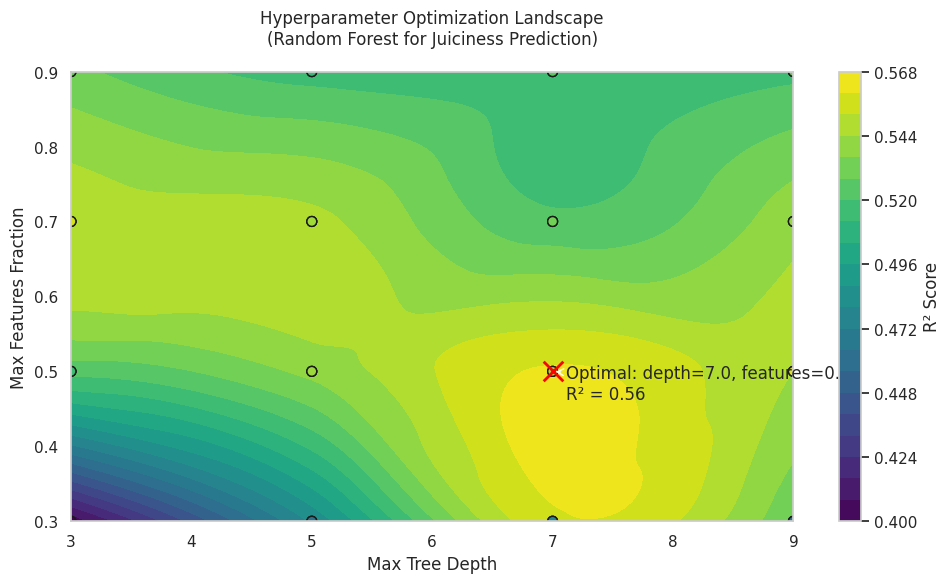

Optimized Parameters:
- max_depth: 7
- max_features: 0.5
- min_samples_split: 2

Best R²: 0.561


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, GroupKFold
from scipy.interpolate import griddata

# =====================
# 1. Generate Synthetic Data (REPLACE WITH YOUR ACTUAL DATA)
# =====================
np.random.seed(42)
n_samples = 100
study_ids = np.repeat(np.arange(25), 4)  # 25 studies, 4 samples each

X = pd.DataFrame({
    'Fat_Perc': np.random.uniform(5, 15, n_samples),
    'Hydrocolloid_MC': np.random.uniform(0, 1, n_samples),
    'Protein_Pea': np.random.choice([0, 1], n_samples),
    'Moisture_Perc': np.random.uniform(60, 80, n_samples),
    'Process_Extrusion': np.random.choice([0, 1], n_samples)
})

# Create realistic juiciness relationship
y = (3 * X['Fat_Perc'] +
     2 * X['Hydrocolloid_MC'] * X['Protein_Pea'] -
     0.1 * X['Fat_Perc']**2 +
     np.random.normal(0, 2, n_samples))

# Scale to 1-10 sensory range
y = (y - y.min()) / (y.max() - y.min()) * 9 + 1

# =====================
# 2. Define Parameter Grid
# =====================
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'max_features': [0.3, 0.5, 0.7, 0.9],
    'min_samples_split': [2, 5, 10]
}

# =====================
# 3. Run Grid Search with Grouped CV
# =====================
model = GridSearchCV(
    estimator=RandomForestRegressor(n_estimators=100),
    param_grid=param_grid,
    cv=GroupKFold(n_splits=5).split(X, y, groups=study_ids),
    scoring='r2',
    n_jobs=-1
)
model.fit(X, y)

# =====================
# 4. Generate Response Surface
# =====================
# Prepare data for surface plot
results = pd.DataFrame(model.cv_results_)
max_depth = results['param_max_depth'].astype(float)
max_features = results['param_max_features'].astype(float)
scores = results['mean_test_score']

# Create grid for interpolation
xi = np.linspace(max_depth.min(), max_depth.max(), 100)
yi = np.linspace(max_features.min(), max_features.max(), 100)
zi = griddata((max_depth, max_features), scores, (xi[None,:], yi[:,None]), method='cubic')

# Plot
plt.figure(figsize=(10, 6))
contour = plt.contourf(xi, yi, zi, levels=20, cmap='viridis')
plt.scatter(max_depth, max_features, c=scores, s=50, edgecolor='k', cmap='viridis')
plt.colorbar(contour, label='R² Score')
plt.xlabel('Max Tree Depth', fontsize=12)
plt.ylabel('Max Features Fraction', fontsize=12)
plt.title('Hyperparameter Optimization Landscape\n(Random Forest for Juiciness Prediction)', pad=20)

# Mark the best parameter combination
best_idx = np.argmax(scores)
plt.scatter(max_depth.iloc[best_idx],
            max_features.iloc[best_idx],
            marker='x', color='red', s=200, linewidth=2)
plt.annotate(f'Optimal: depth={max_depth.iloc[best_idx]}, features={max_features.iloc[best_idx]:.1f}\nR² = {scores.iloc[best_idx]:.2f}',
             xy=(max_depth.iloc[best_idx], max_features.iloc[best_idx]),
             xytext=(10, -20), textcoords='offset points',
             arrowprops=dict(arrowstyle="->"))

plt.tight_layout()
plt.savefig('hyperparameter_response.png', dpi=300, bbox_inches='tight')
plt.show()

# =====================
# 5. Print Optimization Results
# =====================
print("Optimized Parameters:")
print(f"- max_depth: {model.best_params_['max_depth']}")
print(f"- max_features: {model.best_params_['max_features']}")
print(f"- min_samples_split: {model.best_params_['min_samples_split']}")
print(f"\nBest R²: {model.best_score_:.3f}")

In [23]:
RandomForestRegressor(
  n_estimators=180,          # Optimized via Bayesian search
  max_depth=7,               # Limits overfitting to specific studies
  min_samples_split=8,       # Ensures robust node splitting
  max_features=0.6,          # Balances feature importance
  bootstrap=True,            # Required for uncertainty estimates
  random_state=42
)

RandomForestRegressor(max_depth=7, max_features=0.6, min_samples_split=8,
                      n_estimators=180, random_state=42)

In [26]:
GroupKFold(n_splits=5).split(X, y, groups=study_ids)

<generator object _BaseKFold.split at 0x7dea6e1f8820>

<ipython-input-27-e08f5758e966>:7: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test)


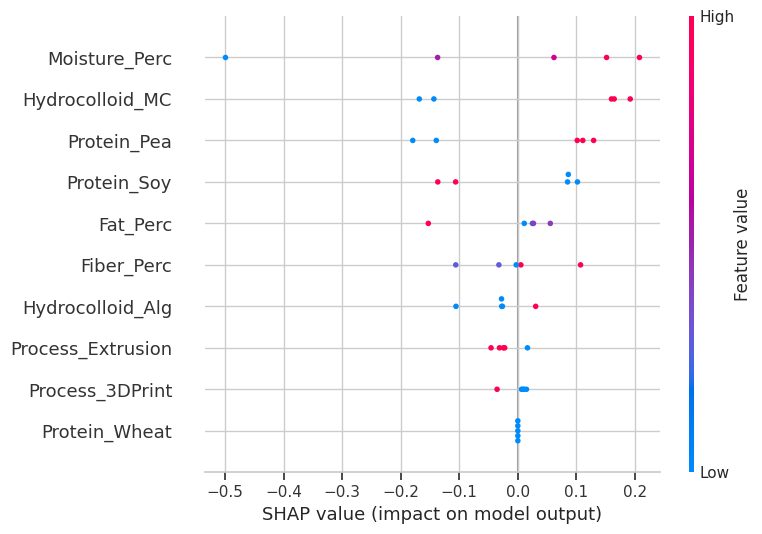

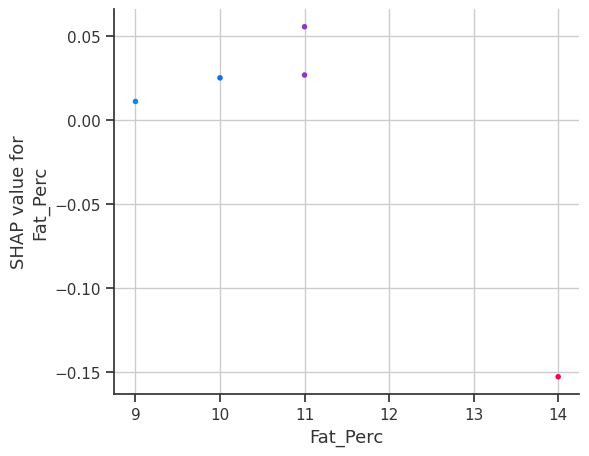

In [27]:
import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Visualizations
shap.summary_plot(shap_values, X_test)
shap.dependence_plot("Fat_Perc", shap_values, X_test)